# Simulate synthetic bulk RNA-seq gene expression data

Nuha BinTayyash, 2020

This notebook shows how to Simulate synthetic bulk RNA-seq time series of $S =3$ replicate, $D=  400$ genes measured at $T=6$ time points. Half of the genes are differentially expressed across time. We use three classes of generative functions $f$ (sine, cosine and cubic splines) to simulate differentially expressed genes and we include a matching non-differentially expressed gene with the same mean in the synthetic data. The sine and cosine functions are of the form $f(x) = a\sin(xb)+c$ with $x\in[-1,1]$. The cubic spline function has the form $f(x) \in C^2 [a,b]$ passing through $n = 5 $ data points $(x,y)$ where $x \in [a,b]$ and $y \in [-5+c,4+c]$. The $[a, b, c]$ are drawn from uniform distributions to vary the amplitude, lengthscale and mean. The low and high dispersion values are drawn from uniform distributions $\alpha_\mathrm{low} = U[.05,.1]$ and $\alpha_\mathrm{high} = U[8,10]$. An exponential inverse-link function is used to determine the mean of count data at each time $\mu(x) = e^{f(x)}$ and we use the Scipy library to sample counts from the negative binomial distribution parametrized by the probability of success $p=\frac{r}{\exp(f)+r}$ and number of failures $r =\frac{1}{dispersion} $ (\citealp{millman2011python}). 

 
Bulk_simulator.py used to simulated four datasets with two levels of the mean of count data (high count and low count datasets) and two levels of dispersion (high dispersion and low dispersion).



In [1]:
%run ./Bulk_simulator.py

100%|██████████| 2/2 [05:57<00:00, 178.60s/it]


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Filter datasets to have mean counts higher than .5 and lower than 250 for low counts dataset and lower than 20000 for high counts dataset 

In [3]:
def filter_counts(counts,min_value,max_value):
    print('shape',counts.shape)
    counts = counts.T
    filtered_counts = counts.loc[:,(counts.mean(0) > min_value) & (counts.mean(0) <= max_value)]
    filtered_counts = filtered_counts.T
    histogram(filtered_counts)
    return filtered_counts

def histogram(counts):
    n, bins, patches = plt.hist(counts.mean(1), facecolor='g')
    plt.grid(True)
    plt.show()

def get_common_genes_between_two_ts(first_ts,second_ts):
    shared_index = first_ts.index.intersection(second_ts.index)
    first_ts = first_ts.loc[shared_index]
    second_ts = second_ts.loc[shared_index]
    return first_ts,second_ts

../data/low_counts_low_dispersion
differentially expressed genes
shape (300, 18)


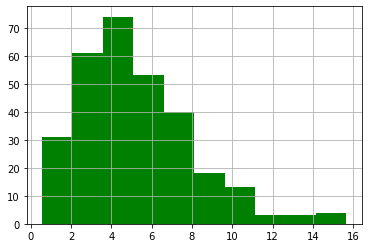

non differentially expressed genes
shape (300, 18)


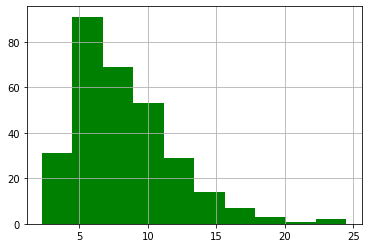

shape (600, 18)
shape (400, 18)
0.5555555555555556
../data/low_counts_high_dispersion
differentially expressed genes
shape (300, 18)


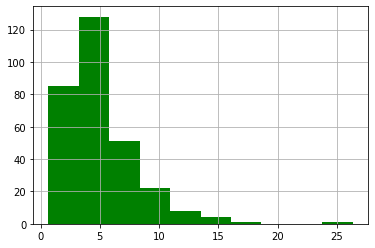

non differentially expressed genes
shape (300, 18)


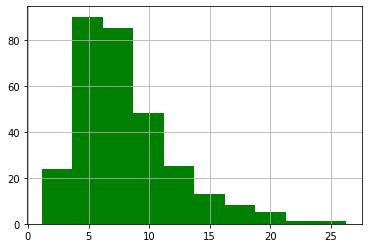

shape (600, 18)
shape (400, 18)
0.6666666666666666
../data/high_counts_low_dispersion
differentially expressed genes
shape (300, 18)


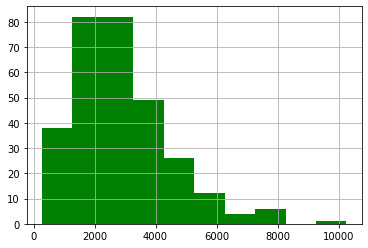

non differentially expressed genes
shape (300, 18)


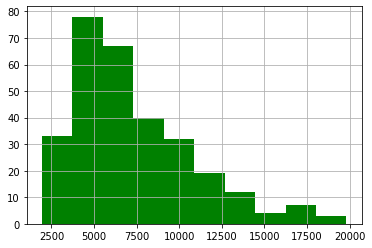

shape (590, 18)
shape (400, 18)
277.8333333333333
../data/high_counts_high_dispersion
differentially expressed genes
shape (300, 18)


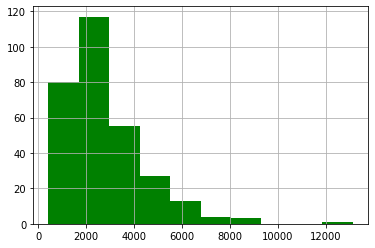

non differentially expressed genes
shape (300, 18)


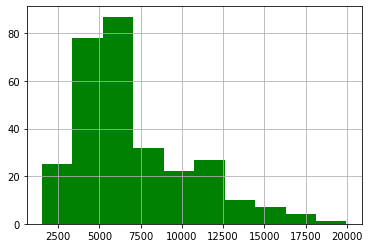

shape (586, 18)
shape (400, 18)
419.05555555555554


In [4]:
filesname = ['../data/low_counts_low_dispersion'
             ,'../data/low_counts_high_dispersion'                                      
             ,'../data/high_counts_low_dispersion'
             ,'../data/high_counts_high_dispersion']

max_mean_count = [250., 20000.] 
min_mean_count = [0.,0.] 
count = 0

for filename in filesname:
    print(filename)
    DE_samples = pd.read_csv(filename+'.csv',index_col=[0])
    Non_DE_samples = DE_samples.iloc[int(DE_samples.shape[0]/2)::,:]
    DE_samples = DE_samples.iloc[0:int(DE_samples.shape[0]/2),:] 
  
    if filename.find('low_counts') != -1:
        max_num = max_mean_count[0]
        min_num = min_mean_count[0]
    else:
        max_num = max_mean_count[1]
        min_num = min_mean_count[1]
    print('differentially expressed genes')    
    DE_samples_filtered = filter_counts(DE_samples,min_num,max_num)
    print('non differentially expressed genes')
    Non_DE_samples_filtered = filter_counts(Non_DE_samples,min_num,max_num)
    
    DE_samples_filtered,Non_DE_samples_filtered = get_common_genes_between_two_ts(DE_samples_filtered,Non_DE_samples_filtered)
    
    DE_non_DE = DE_samples_filtered
    DE_non_DE = DE_non_DE.T
    # create a dataframe that have differentially expressed genes followed by non differentially expressed genes
    for i in range(Non_DE_samples_filtered.shape[0]):
        DE_non_DE.insert(i+i+1,Non_DE_samples_filtered.index.values[i] ,Non_DE_samples_filtered.iloc[[i]].values.T,True)
    DE_non_DE = DE_non_DE.T
    
    genes = ['gene_%s' % (count+s+1) for s in range(DE_non_DE.shape[0])] 
    DE_non_DE.index = genes
    print('shape',DE_non_DE.shape)
    #DE_non_DE.iloc[0:400,:]
    DE_non_DE.iloc[0:400,:].to_csv(filename+'.csv')
    print('shape',DE_non_DE.iloc[0:400,:].shape)
    print(np.min(DE_non_DE.iloc[0:400,:].mean(1)))

    count = count + 100